In [1]:
import pandas as pd

In [13]:
from google.colab import files
uploaded = files.upload()


Saving partpdf_1758712161434_netflix_titles.xlsx to partpdf_1758712161434_netflix_titles.xlsx


In [14]:
import pandas as pd

# Load all sheets into a dictionary
excel_data = pd.read_excel('/content/partpdf_1758712161434_netflix_titles (1).xlsx', sheet_name=None)

# Display sheet names
print(excel_data.keys())


dict_keys(['netflix_titles', 'netflix_titles_directors', 'netflix_titles_countries', 'netflix_titles_cast', 'netflix_titles_category'])


In [16]:
titles_df = excel_data['netflix_titles']
directors_df = excel_data['netflix_titles_directors']
countries_df = excel_data['netflix_titles_countries']
cast_df = excel_data['netflix_titles_cast']
category_df = excel_data['netflix_titles_category']


In [17]:
# Merge step-by-step
merged_df = titles_df.merge(directors_df, on='show_id', how='outer') \
                     .merge(countries_df, on='show_id', how='outer') \
                     .merge(cast_df, on='show_id', how='outer') \
                     .merge(category_df, on='show_id', how='outer')


In [19]:
print(merged_df.head())

# Save to Excel
merged_df.to_excel('netflix_master.xlsx', index=False)

# Download the file
files.download('netflix_master.xlsx')



  duration_minutes duration_seasons   type               title  \
0              172              NaN  Movie  Amar Akbar Anthony   
1              172              NaN  Movie  Amar Akbar Anthony   
2              172              NaN  Movie  Amar Akbar Anthony   
3              172              NaN  Movie  Amar Akbar Anthony   
4              172              NaN  Movie  Amar Akbar Anthony   

            date_added  release_year rating  \
0  2019-12-31 00:00:00        1977.0  TV-14   
1  2019-12-31 00:00:00        1977.0  TV-14   
2  2019-12-31 00:00:00        1977.0  TV-14   
3  2019-12-31 00:00:00        1977.0  TV-14   
4  2019-12-31 00:00:00        1977.0  TV-14   

                                         description   show_id  \
0  Abandoned in a park by their father, Amar, Akb...  247747.0   
1  Abandoned in a park by their father, Amar, Akb...  247747.0   
2  Abandoned in a park by their father, Amar, Akb...  247747.0   
3  Abandoned in a park by their father, Amar, Akb...  24

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

To combine the netflix_titles sheet with the other sheets I used an outer join on the show_id column.

An outer join ensures that all records from all sheets are included in the final master DataFrame — even if some entries are missing in one or more sheets. This is especially important for this dataset because:

- Not every title may have a listed director, cast, country, or category.
- We want to preserve the full list of Netflix titles from the main sheet    netflix_titles and enrich it with any available metadata from the other sheets.
- Using an inner join would exclude titles that are missing data in any one sheet, which could lead to significant data loss.

By using an outer join, we maintain the integrity of the full dataset and ensure that no title is dropped simply because it's missing some metadata. This approach is ideal for exploratory analysis and data enrichment.


#Preprocessing

In [20]:
merged_df.head()


,duration_minutes,duration_seasons,type,title,date_added,release_year,rating,description,show_id,director,country,cast,listed_in
0,172,NaN,Movie,Amar Akbar Anthony,2019-12-31 00:00:00,1977.0,TV-14,"Abandoned in a park by their father, Amar, Akb...",247747.0,Manmohan Desai,India,Vinod Khanna,Action & Adventure
1,172,NaN,Movie,Amar Akbar Anthony,2019-12-31 00:00:00,1977.0,TV-14,"Abandoned in a park by their father, Amar, Akb...",247747.0,Manmohan Desai,India,Vinod Khanna,Classic Movies
2,172,NaN,Movie,Amar Akbar Anthony,2019-12-31 00:00:00,1977.0,TV-14,"Abandoned in a park by their father, Amar, Akb...",247747.0,Manmohan Desai,India,Vinod Khanna,Comedies
3,172,NaN,Movie,Amar Akbar Anthony,2019-12-31 00:00:00,1977.0,TV-14,"Abandoned in a park by their father, Amar, Akb...",247747.0,Manmohan Desai,India,Parveen Babi,Action & Adventure
4,172,NaN,Movie,Amar Akbar Anthony,2019-12-31 00:00:00,1977.0,TV-14,"Abandoned in a park by their father, Amar, Akb...",247747.0,Manmohan Desai,India,Parveen Babi,Classic Movies


In [21]:
merged_df.isna().sum()

,0
duration_minutes,41397
duration_seasons,98571
type,13
title,13
date_added,173
release_year,14
rating,88
description,15
show_id,4
director,38915


In [23]:
#fill columns date_added, director, and country.
merged_df['date_added'].fillna('Unknown', inplace=True)
merged_df['director'].fillna('Unknown', inplace=True)
merged_df['country'].fillna('Unknown', inplace=True)


In [24]:
merged_df.isna().sum()

,0
duration_minutes,41397
duration_seasons,98571
type,13
title,13
date_added,0
release_year,14
rating,88
description,15
show_id,4
director,0


In [27]:
#Convert date_added to datetime format
# Convert to datetime
merged_df['date_added'] = pd.to_datetime(merged_df['date_added'], errors='coerce')


In [28]:
merged_df.head()

,duration_minutes,duration_seasons,type,title,date_added,release_year,rating,description,show_id,director,country,cast,listed_in
0,172,NaN,Movie,Amar Akbar Anthony,2019-12-31,1977.0,TV-14,"Abandoned in a park by their father, Amar, Akb...",247747.0,Manmohan Desai,India,Vinod Khanna,Action & Adventure
1,172,NaN,Movie,Amar Akbar Anthony,2019-12-31,1977.0,TV-14,"Abandoned in a park by their father, Amar, Akb...",247747.0,Manmohan Desai,India,Vinod Khanna,Classic Movies
2,172,NaN,Movie,Amar Akbar Anthony,2019-12-31,1977.0,TV-14,"Abandoned in a park by their father, Amar, Akb...",247747.0,Manmohan Desai,India,Vinod Khanna,Comedies
3,172,NaN,Movie,Amar Akbar Anthony,2019-12-31,1977.0,TV-14,"Abandoned in a park by their father, Amar, Akb...",247747.0,Manmohan Desai,India,Parveen Babi,Action & Adventure
4,172,NaN,Movie,Amar Akbar Anthony,2019-12-31,1977.0,TV-14,"Abandoned in a park by their father, Amar, Akb...",247747.0,Manmohan Desai,India,Parveen Babi,Classic Movies


In [29]:
#Extract year_added for trend analysis
# Create a new column for year
merged_df['year_added'] = merged_df['date_added'].dt.year

# Preview the result
print(merged_df[['date_added', 'year_added']].head())


  date_added  year_added
0 2019-12-31      2019.0
1 2019-12-31      2019.0
2 2019-12-31      2019.0
3 2019-12-31      2019.0
4 2019-12-31      2019.0


In [30]:
merged_df.head()

,duration_minutes,duration_seasons,type,title,date_added,release_year,rating,description,show_id,director,country,cast,listed_in,year_added
0,172,NaN,Movie,Amar Akbar Anthony,2019-12-31,1977.0,TV-14,"Abandoned in a park by their father, Amar, Akb...",247747.0,Manmohan Desai,India,Vinod Khanna,Action & Adventure,2019.0
1,172,NaN,Movie,Amar Akbar Anthony,2019-12-31,1977.0,TV-14,"Abandoned in a park by their father, Amar, Akb...",247747.0,Manmohan Desai,India,Vinod Khanna,Classic Movies,2019.0
2,172,NaN,Movie,Amar Akbar Anthony,2019-12-31,1977.0,TV-14,"Abandoned in a park by their father, Amar, Akb...",247747.0,Manmohan Desai,India,Vinod Khanna,Comedies,2019.0
3,172,NaN,Movie,Amar Akbar Anthony,2019-12-31,1977.0,TV-14,"Abandoned in a park by their father, Amar, Akb...",247747.0,Manmohan Desai,India,Parveen Babi,Action & Adventure,2019.0
4,172,NaN,Movie,Amar Akbar Anthony,2019-12-31,1977.0,TV-14,"Abandoned in a park by their father, Amar, Akb...",247747.0,Manmohan Desai,India,Parveen Babi,Classic Movies,2019.0




To address missing values in the country column, I chose to fill them with a placeholder value Unknown rather than dropping the rows or attempting imputation.


- Preserves the dataset size: Dropping rows with missing country data could result in significant data loss, especially if many titles lack this information.
- Avoids misleading assumptions: Imputing country values based on other features like language or director could introduce bias or inaccuracies.
- Supports downstream analysis: Using Unknown allows us to easily filter or group titles with missing country data without losing them entirely.

This strategy ensures that the dataset remains comprehensive while clearly marking entries with incomplete metadata for further review or exclusion in specific analyses.


In [31]:
# Drop rows with missing title or show_id
merged_df.dropna(subset=['title', 'show_id'], inplace=True)

# Fill missing values
merged_df['type'].fillna(merged_df['type'].mode()[0], inplace=True)
merged_df['release_year'].fillna(merged_df['release_year'].median(), inplace=True)
merged_df['rating'].fillna('Not Rated', inplace=True)
merged_df['description'].fillna('No description available', inplace=True)
merged_df['cast'].fillna('Cast not listed', inplace=True)
merged_df['listed_in'].fillna('Uncategorized', inplace=True)

# Handle duration columns
merged_df['duration_minutes'].fillna(merged_df['duration_minutes'].median(), inplace=True)
merged_df['duration_seasons'].fillna(1, inplace=True)  # assuming single-season default


/tmp/ipython-input-2881473954.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['type'].fillna(merged_df['type'].mode()[0], inplace=True)
/tmp/ipython-input-2881473954.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inp

In [33]:


# Fill missing 'date_added' using release_year (as a proxy)
merged_df['date_added'] = merged_df.apply(
    lambda row: pd.Timestamp(f"{int(row['release_year'])}-01-01") if pd.isnull(row['date_added']) else row['date_added'],
    axis=1
)

# Recalculate 'year_added'
merged_df['year_added'] = merged_df['date_added'].dt.year


In [34]:
merged_df.isna().sum()

,0
duration_minutes,0
duration_seasons,0
type,0
title,0
date_added,0
release_year,0
rating,0
description,0
show_id,0
director,0


#Advanced Data Transformation

In [35]:
# Remove leading/trailing spaces and split by comma
merged_df['listed_in'] = merged_df['listed_in'].str.split(', ')


In [36]:
exploded_df = merged_df.explode('listed_in')


In [37]:
exploded_df.head()

,duration_minutes,duration_seasons,type,title,date_added,release_year,rating,description,show_id,director,country,cast,listed_in,year_added
0,172.0,1,Movie,Amar Akbar Anthony,2019-12-31,1977.0,TV-14,"Abandoned in a park by their father, Amar, Akb...",247747.0,Manmohan Desai,India,Vinod Khanna,Action & Adventure,2019
1,172.0,1,Movie,Amar Akbar Anthony,2019-12-31,1977.0,TV-14,"Abandoned in a park by their father, Amar, Akb...",247747.0,Manmohan Desai,India,Vinod Khanna,Classic Movies,2019
2,172.0,1,Movie,Amar Akbar Anthony,2019-12-31,1977.0,TV-14,"Abandoned in a park by their father, Amar, Akb...",247747.0,Manmohan Desai,India,Vinod Khanna,Comedies,2019
3,172.0,1,Movie,Amar Akbar Anthony,2019-12-31,1977.0,TV-14,"Abandoned in a park by their father, Amar, Akb...",247747.0,Manmohan Desai,India,Parveen Babi,Action & Adventure,2019
4,172.0,1,Movie,Amar Akbar Anthony,2019-12-31,1977.0,TV-14,"Abandoned in a park by their father, Amar, Akb...",247747.0,Manmohan Desai,India,Parveen Babi,Classic Movies,2019


By splitting up the categories in the listed_in column so each one gets its own row, we make the data easier to work with.

- Count how many shows belong to each genre
- See which genres are most popular
- Track how genre trends change over time

Before, each show had all its genres in one cell — now we can look at each genre separately and do better analysis.


#EDA

In [38]:
top_genres = exploded_df['listed_in'].value_counts().head(10)


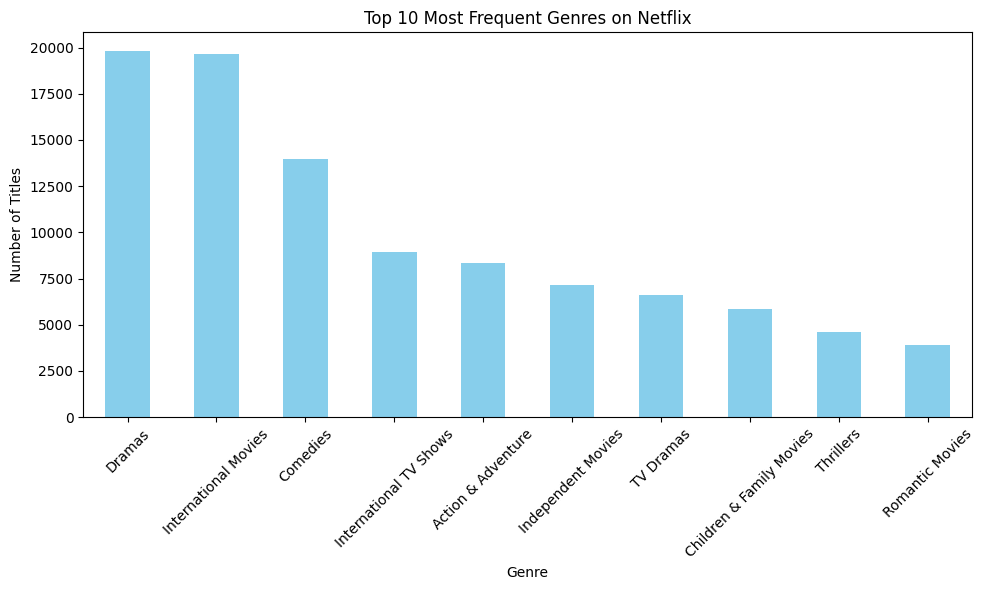

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
top_genres.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Frequent Genres on Netflix')
plt.xlabel('Genre')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The bar chart showing the Top 10 most frequent genres on Netflix reveals a clear concentration in the "International TV Shows" category. This suggests that Netflix is actively pursuing a strategy of global content acquisition and localization.

-  By investing heavily in international content, Netflix can appeal to a broader audience across different regions and cultures.
- This strategy supports Netflix’s growth in emerging markets where local content is a key driver of subscriptions.
- A strong presence of international genres enhances the platform’s content diversity, making it more attractive to users seeking non-Western narratives.



In [40]:
merged_df.to_csv('netflix_merged.csv', index=False)
exploded_df.to_csv('netflix_exploded.csv', index=False)
